In [23]:
#importing the libraries
import numpy as np
import pandas as pd 
import geopandas as gpd
import os

In [24]:
# defining our target
target = 'PROSTITUTION'

In [25]:
#directory
infolder = r"C:\Users\eduar\OneDrive\Área de Trabalho\EXPERIMENTOS DATA SCIENCE E GIS\CASE KG\infolder" 
outfolder = r"C:\Users\eduar\OneDrive\Área de Trabalho\EXPERIMENTOS DATA SCIENCE E GIS\CASE KG\outfolder\data_cleaning\out"

In [26]:
#importing the database
df_base = pd.read_csv(os.path.join(infolder,"crimes.csv"))
df_base.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


Let's check our data

In [27]:
df_base.shape

(878049, 9)

In [28]:
df_base.describe()

,X,Y
count,878049.000000,878049.000000
mean,-122.422616,37.771020
std,0.030354,0.456893
min,-122.513642,37.707879
25%,-122.432952,37.752427
50%,-122.416420,37.775421
75%,-122.406959,37.784369
max,-120.500000,90.000000


In [29]:
df_base.groupby("Category").count()

,Dates,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
Category,,,,,,,,
ARSON,1513,1513,1513,1513,1513,1513,1513,1513
ASSAULT,76876,76876,76876,76876,76876,76876,76876,76876
BAD CHECKS,406,406,406,406,406,406,406,406
BRIBERY,289,289,289,289,289,289,289,289
BURGLARY,36755,36755,36755,36755,36755,36755,36755,36755
DISORDERLY CONDUCT,4320,4320,4320,4320,4320,4320,4320,4320
DRIVING UNDER THE INFLUENCE,2268,2268,2268,2268,2268,2268,2268,2268
DRUG/NARCOTIC,53971,53971,53971,53971,53971,53971,53971,53971
DRUNKENNESS,4280,4280,4280,4280,4280,4280,4280,4280


In [30]:
df_base.loc[df_base["Category"] == target].groupby("Descript").count()

,Dates,Category,DayOfWeek,PdDistrict,Resolution,Address,X,Y
Descript,,,,,,,,
"DISORDERLY HOUSE, KEEPING",3,3,3,3,3,3,3,3
ENGAGING IN LEWD CONDUCT - PROSTITUTION RELATED,158,158,158,158,158,158,158,158
HUMAN TRAFFICKING,70,70,70,70,70,70,70,70
INDECENT EXPOSURE - PROSTITUTION RELATED,53,53,53,53,53,53,53,53
INMATE/KEEPER OF HOUSE OF PROSTITUTION,30,30,30,30,30,30,30,30
LOITERING FOR PURPOSE OF PROSTITUTION,1243,1243,1243,1243,1243,1243,1243,1243
PANDERING,58,58,58,58,58,58,58,58
PIMPING,90,90,90,90,90,90,90,90
PLACING WIFE IN HOUSE OF PROSTITUTION,7,7,7,7,7,7,7,7


In [31]:
df_base.loc[df_base["Category"] == target].groupby("Resolution").count()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Address,X,Y
Resolution,,,,,,,,
"ARREST, BOOKED",2331,2331,2331,2331,2331,2331,2331,2331
"ARREST, CITED",4744,4744,4744,4744,4744,4744,4744,4744
COMPLAINANT REFUSES TO PROSECUTE,5,5,5,5,5,5,5,5
DISTRICT ATTORNEY REFUSES TO PROSECUTE,4,4,4,4,4,4,4,4
EXCEPTIONAL CLEARANCE,4,4,4,4,4,4,4,4
JUVENILE ADMONISHED,2,2,2,2,2,2,2,2
JUVENILE BOOKED,71,71,71,71,71,71,71,71
JUVENILE CITED,7,7,7,7,7,7,7,7
LOCATED,5,5,5,5,5,5,5,5


# DATA CLEANING

In [32]:
#verifying null values
(df_base.isnull().sum()/df_base.isnull().shape[0])*100

Dates         0.0
Category      0.0
Descript      0.0
DayOfWeek     0.0
PdDistrict    0.0
Resolution    0.0
Address       0.0
X             0.0
Y             0.0
dtype: float64

In [33]:
#creating our target column
df_base = df_base.join(pd.get_dummies(df_base["Category"])[target])

In [34]:
#Transforming the DF into a Geodataframe
gdf_crimes = gpd.GeoDataFrame(df_base, geometry=gpd.points_from_xy(df_base.X,df_base.Y))

C:\Users\eduar\.conda\envs\exp\lib\site-packages\geopandas\array.py:275: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  return GeometryArray(vectorized.points_from_xy(x, y, z), crs=crs)


In [35]:
#seting a coordinates system
gdf_crimes.set_crs("EPSG:4326", inplace = True)

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,PROSTITUTION,geometry
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,0,POINT (-122.42589 37.77460)
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,0,POINT (-122.42589 37.77460)
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,0,POINT (-122.42436 37.80041)
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,0,POINT (-122.42700 37.80087)
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,0,POINT (-122.43874 37.77154)
...,...,...,...,...,...,...,...,...,...,...,...
878044,2003-01-06 00:15:00,ROBBERY,ROBBERY ON THE STREET WITH A GUN,Monday,TARAVAL,NONE,FARALLONES ST / CAPITOL AV,-122.459033,37.714056,0,POINT (-122.45903 37.71406)
878045,2003-01-06 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Monday,INGLESIDE,NONE,600 Block of EDNA ST,-122.447364,37.731948,0,POINT (-122.44736 37.73195)
878046,2003-01-06 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Monday,SOUTHERN,NONE,5TH ST / FOLSOM ST,-122.403390,37.780266,0,POINT (-122.40339 37.78027)
878047,2003-01-06 00:01:00,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",Monday,SOUTHERN,NONE,TOWNSEND ST / 2ND ST,-122.390531,37.780607,0,POINT (-122.39053 37.78061)


<AxesSubplot:>

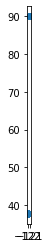

In [36]:
#As we can see we have some issues with the coordinates
gdf_crimes.plot()

In [37]:
#lets import a shapefile to help us
sf = gpd.read_file(os.path.join(infolder,"sf_shape.shp"))

In [38]:
#seting a coordinates system
sf.to_crs("EPSG:4326",inplace = True)

In [39]:
#Here i created a list to helping handle with the coordinates problem
lista_neigh = gdf_crimes["PdDistrict"].unique().tolist()


In [40]:
#With this loop we "filter" the crimes that intersect that San Francisco Boundaries(the shapefile area)
for x in lista_neigh:
    neigh_base = gdf_crimes.loc[gdf_crimes["PdDistrict"] == x]
    intersecao = gpd.overlay(neigh_base, sf, how = "intersection")
    intersecao.to_csv(os.path.join(outfolder,"{}.csv".format(x)))

In [41]:
#Joining the csvs
import glob
filenames = glob.glob(outfolder + "/*.csv")

dfs = []

for filename in filenames:
    print(filename)
    dfs.append(pd.read_csv(filename))
    os.unlink(filename)


big_frame = pd.concat(dfs, ignore_index=True)

C:\Users\eduar\OneDrive\Área de Trabalho\EXPERIMENTOS DATA SCIENCE E GIS\CASE KG\outfolder\data_cleaning\out\BAYVIEW.csv
C:\Users\eduar\OneDrive\Área de Trabalho\EXPERIMENTOS DATA SCIENCE E GIS\CASE KG\outfolder\data_cleaning\out\CENTRAL.csv
C:\Users\eduar\OneDrive\Área de Trabalho\EXPERIMENTOS DATA SCIENCE E GIS\CASE KG\outfolder\data_cleaning\out\INGLESIDE.csv
C:\Users\eduar\OneDrive\Área de Trabalho\EXPERIMENTOS DATA SCIENCE E GIS\CASE KG\outfolder\data_cleaning\out\MISSION.csv
C:\Users\eduar\OneDrive\Área de Trabalho\EXPERIMENTOS DATA SCIENCE E GIS\CASE KG\outfolder\data_cleaning\out\NORTHERN.csv
C:\Users\eduar\OneDrive\Área de Trabalho\EXPERIMENTOS DATA SCIENCE E GIS\CASE KG\outfolder\data_cleaning\out\PARK.csv
C:\Users\eduar\OneDrive\Área de Trabalho\EXPERIMENTOS DATA SCIENCE E GIS\CASE KG\outfolder\data_cleaning\out\RICHMOND.csv
C:\Users\eduar\OneDrive\Área de Trabalho\EXPERIMENTOS DATA SCIENCE E GIS\CASE KG\outfolder\data_cleaning\out\SOUTHERN.csv
C:\Users\eduar\OneDrive\Área d

In [42]:
big_frame.to_csv(os.path.join(outfolder,"cleaned.csv"))